## Data Modeling and Evaluation Steps (model 3)

At this moment, we are going to create and implement the *Long Short Term Memory* (LSTM) model.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Step 1: Retake the *X* and *y* variables from our trainning set

In [1]:
# Import basic libraries
import pandas as pd
import numpy as np

In [2]:
# Load the trainning dataset
# train_medication_reviews = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/Sentiment-Analysis-of-Medication-Reviews-Project/medication_reviews_dataset_to_train.csv', sep=',')
train_medication_reviews = pd.read_csv('/Users/rafaelaqueiroz/Sentiment-Analysis-of-Medication-Reviews-Project/medication_reviews_dataset_to_train.csv', sep=',')
train_medication_reviews

,drugName,condition,rating,date,usefulCount,year,review_word_lemm,polarity,rating_classification
0,Valsartan,Left Ventricular Dysfunction,9.0,2012-05-20,27,2012,"['no', 'side', 'effect', 'take', 'combination'...",0.000000,2
1,Guanfacine,ADHD,8.0,2010-04-27,192,2010,"['son', 'halfway', 'fourth', 'week', 'intuniv'...",0.188021,2
2,Lybrel,Birth Control,5.0,2009-12-14,17,2009,"['used', 'take', 'another', 'oral', 'contracep...",0.113636,1
3,Ortho Evra,Birth Control,8.0,2015-11-03,10,2015,"['first', 'time', 'using', 'form', 'birth', 'c...",0.262500,2
4,Buprenorphine / naloxone,Opiate Dependence,9.0,2016-11-27,37,2016,"['suboxone', 'completely', 'turned', 'life', '...",0.163333,2
...,...,...,...,...,...,...,...,...,...
112324,Carbamazepine,Trigeminal Neuralgia,1.0,2016-01-31,10,2016,"['mg', 'seems', 'work', 'every', 'nd', 'day', ...",0.000000,0
112325,Tekturna,High Blood Pressure,7.0,2010-02-07,18,2010,"['tekturna', 'day', 'effect', 'immediate', 'al...",-0.087500,2
112326,Campral,Alcohol Dependence,10.0,2015-05-31,125,2015,"['wrote', 'first', 'report', 'midoctober', 'no...",0.261905,2
112327,Thyroid desiccated,Underactive Thyroid,10.0,2015-09-19,79,2015,"['ive', 'thyroid', 'medication', 'year', 'spen...",0.201313,2


In [3]:
# As we already know from our previous notebook (notebook 3), our independent variable (X) is going to be the "review_word_lemm" variable
X_train = train_medication_reviews.review_word_lemm
X_train

0         ['no', 'side', 'effect', 'take', 'combination'...
1         ['son', 'halfway', 'fourth', 'week', 'intuniv'...
2         ['used', 'take', 'another', 'oral', 'contracep...
3         ['first', 'time', 'using', 'form', 'birth', 'c...
4         ['suboxone', 'completely', 'turned', 'life', '...
                                ...                        
112324    ['mg', 'seems', 'work', 'every', 'nd', 'day', ...
112325    ['tekturna', 'day', 'effect', 'immediate', 'al...
112326    ['wrote', 'first', 'report', 'midoctober', 'no...
112327    ['ive', 'thyroid', 'medication', 'year', 'spen...
112328    ['ive', 'chronic', 'constipation', 'adult', 'l...
Name: review_word_lemm, Length: 112329, dtype: object

In [5]:
X_train.shape

(112329,)

In [6]:
type(X_train)

pandas.core.series.Series

In [7]:
X_train[0]

"['no', 'side', 'effect', 'take', 'combination', 'bystolic', 'mg', 'fish', 'oil']"

In [4]:
# As we know, our target or dependent variable (y) is going to be the 'rating_classification' variable
y_train = train_medication_reviews.rating_classification
y_train

0         2
1         2
2         1
3         2
4         2
         ..
112324    0
112325    2
112326    2
112327    2
112328    2
Name: rating_classification, Length: 112329, dtype: int64

In [9]:
y_train.shape

(112329,)

In [10]:
type(y_train)

pandas.core.series.Series

#### Step 2: Create the *X* and *y* variables from our testing set

Note: As this is the testing set, we are not going to apply any cleaning or processint to it. However, as we have done label encoding to the *rating* column, we would need to label encoding this column at this set as well since the model cannot predict the sentiment of the reviews from rating 1 to 10 as we are representing those numbers differently, such as: 0 - negative reviews, 1 - "neutral" reviews, and 2 - positive reviews.

In [5]:
# Load the test dataset
# test_drug_reviews_df = pd.read_csv('/content/drive/MyDrive/Data-Science-Other-Materials/Data-Scientist-Bootcamp/Sentiment-Analysis-of-Drug-Reviews/drugsComTest_raw.tsv', delimiter='\t')
test_drug_reviews_df = pd.read_csv('/Users/rafaelaqueiroz/Sentiment-Analysis-of-Medication-Reviews-Project/drugsComTest_raw.tsv', delimiter='\t')
test_drug_reviews_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [12]:
test_drug_reviews_df.shape

(53766, 7)

In [13]:
type(test_drug_reviews_df)

pandas.core.frame.DataFrame

In [6]:
# Import library to label encode the rating column
from sklearn.preprocessing import LabelEncoder

# Define the bin edges and labels (0 = 'negative', 1 = 'neutral', 2 = 'positive')
bin_edges = [0, 4, 6, 10]  # Ratings 1-4 are negative, 5-6 are neutral, 7-10 are positive
bin_labels = ['negative', 'neutral', 'positive'] # The rating_classification column should now only have 0, 1, or 2 values

# Use cut to bin the "rating" column and create the new column called "rating_classification"
test_drug_reviews_df['rating_classification'] = pd.cut(test_drug_reviews_df['rating'], bins=bin_edges, labels=bin_labels)

# Instantiate LabelEncoder and fit_transform the new column
le = LabelEncoder()
test_drug_reviews_df['rating_classification'] = le.fit_transform(test_drug_reviews_df['rating_classification'])
test_drug_reviews_df.head(5)

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,rating_classification
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,2
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,2
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,2
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,2
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,2


In [15]:
type(test_drug_reviews_df)

pandas.core.frame.DataFrame

In [16]:
test_drug_reviews_df.shape

(53766, 8)

In [7]:
X_test = test_drug_reviews_df['review']
X_test

0        "I&#039;ve tried a few antidepressants over th...
1        "My son has Crohn&#039;s disease and has done ...
2                            "Quick reduction of symptoms"
3        "Contrave combines drugs that were used for al...
4        "I have been on this birth control for one cyc...
                               ...                        
53761    "I have taken Tamoxifen for 5 years. Side effe...
53762    "I&#039;ve been taking Lexapro (escitaploprgra...
53763    "I&#039;m married, 34 years old and I have no ...
53764    "I was prescribed Nucynta for severe neck/shou...
53765                                        "It works!!!"
Name: review, Length: 53766, dtype: object

In [18]:
type(X_test)

pandas.core.series.Series

In [19]:
X_test.shape

(53766,)

In [8]:
y_test = test_drug_reviews_df.rating_classification
y_test

0        2
1        2
2        2
3        2
4        2
        ..
53761    2
53762    2
53763    2
53764    0
53765    2
Name: rating_classification, Length: 53766, dtype: int64

In [21]:
type(y_test)

pandas.core.series.Series

In [22]:
y_test.shape

(53766,)

### Create the models

#### 3.3 Keras, Tensorflow and Neural Networks

In [9]:
# Import basic NLP libraries
import re # Import regular expressions
import nltk # Import nltk packages
nltk.download(['punkt', 'wordnet'])
from nltk.tokenize import word_tokenize # For tokenization
from nltk.stem import WordNetLemmatizer            

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rafaelaqueiroz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/rafaelaqueiroz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Import specifc libraries 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # For BoW and TFIDF

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import keras
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

import math

In [13]:
data = test_drug_reviews_df
data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,rating_classification
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22,2
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17,2
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3,2
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,2
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4,2


In [14]:
# Check the average lenght of the sentences and, again, the balance between 0 and 2 reviews (this code was adapted from: https://www.analyticsvidhya.com/blog/2022/01/sentiment-analysis-with-lstm/)
s = 0.0
data = train_medication_reviews
for i in data['review_word_lemm']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each review : ",s/data.shape[0])
pos = 0
for i in range(data.shape[0]):
    if data.iloc[i]['rating_classification'] == 2:
        pos = pos + 1
neg = data.shape[0]-pos
print("Percentage of reviews with positive sentiment is "+str(pos/data.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/data.shape[0]*100)+"%")

Average length of each review :  42.32192043016496
Percentage of reviews with positive sentiment is 66.32036250656553%
Percentage of reviews with negative sentiment is 33.67963749343447%


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train_vect = vectorizer.transform(X_train)
X_test_vect  = vectorizer.transform(X_test)

In [29]:
X_train.head()

0    ['no', 'side', 'effect', 'take', 'combination'...
1    ['son', 'halfway', 'fourth', 'week', 'intuniv'...
2    ['used', 'take', 'another', 'oral', 'contracep...
3    ['first', 'time', 'using', 'form', 'birth', 'c...
4    ['suboxone', 'completely', 'turned', 'life', '...
Name: review_word_lemm, dtype: object

In [30]:
X_train.shape

(112329,)

In [31]:
X_train_vect

<112329x66660 sparse matrix of type '<class 'numpy.int64'>'
	with 4111730 stored elements in Compressed Sparse Row format>

In [32]:
X_test.head()

0    "I&#039;ve tried a few antidepressants over th...
1    "My son has Crohn&#039;s disease and has done ...
2                        "Quick reduction of symptoms"
3    "Contrave combines drugs that were used for al...
4    "I have been on this birth control for one cyc...
Name: review, dtype: object

In [33]:
X_test.shape

(53766,)

In [34]:
X_test_vect 

<53766x66660 sparse matrix of type '<class 'numpy.int64'>'
	with 1995631 stored elements in Compressed Sparse Row format>

In [42]:
from keras.models import Sequential
from keras import layers

input_dim = 66660  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

In [43]:
model.compile(loss='categorical_crossentropy', 
             optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                666610    
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 666,621
Trainable params: 666,621
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Import 'to_categorical module
from keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoded arrays
y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

# Convert the one-hot encoded arrays to arrays of shape (None, 1)
y_train_onehot_1d = np.argmax(y_train_onehot, axis=-1).reshape(-1, 1)
y_test_onehot_1d = np.argmax(y_test_onehot, axis=-1).reshape(-1, 1)

# Train the model using the 1D arrays
history = model.fit(X_train_vect, y_train_onehot_1d,
                    epochs=15,
                    verbose=False,
                    validation_data=(X_test_vect, y_test_onehot_1d),
                    batch_size=10)

In [45]:
loss, accuracy = model.evaluate(X_train_vect, y_train_onehot_1d, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test_vect, y_test_onehot_1d, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.0890
Testing Accuracy:  0.0898


In [46]:
import matplotlib.pyplot as plt # This code was adapted from this site: https://realpython.com/python-keras-text-classification/
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

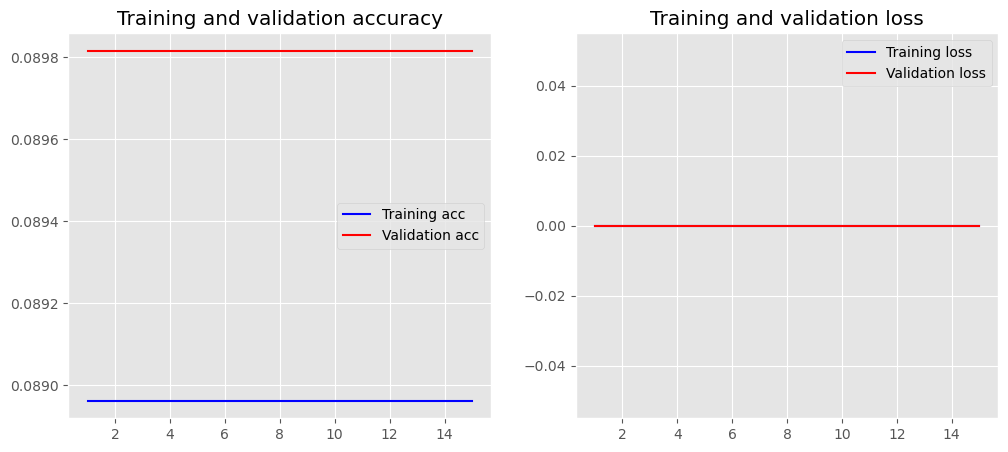

In [47]:
plot_history(history)

#### 3.4 Long Short Term-Memory (LSTM)

In [10]:
# In case if I want to rerun the model, clear the session to prevent overfitting
from keras.backend import clear_session
clear_session()

2023-03-28 23:57:31.392326: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# Hyperparameters of the model
vocab_size = 66660 # It should be based in the size of your vocabulary (our vocabulary has the size of ?)
embedding_dim = 200
max_length = 80 # It is based on the length of the sentences (watch out to avoid overfitting and underfitting)
padding_type='post'
trunc_type='post'
num_classes=3

# Tokenize the texts
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

# Convert the text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences
X_train_padded = pad_sequences(X_train_seq, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_length, padding='post')

In [67]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert integer labels to one-hot vectors
y_train_onehot = to_categorical(y_train)
y_train_onehot = y_train_onehot.astype('float32')
y_test_onehot = to_categorical(y_test)

# # Convert integer labels to one-hot vectors
# X_train = X_train_padded.astype('float32')
# X_test = X_test_padded.astype('float32')
# y_train_onehot = to_categorical(y_train)
# y_train_onehot = y_train_onehot.astype('float32')
# y_test_onehot = to_categorical(y_test)

# Train the model
model.fit(X_train_padded, y_train_onehot, batch_size=32, epochs=5, verbose=1)
model.summary

Epoch 1/5
3511/3511 [==============================] - 1129s 320ms/step - loss: 0.6993 - accuracy: 0.7257
Epoch 2/5
3511/3511 [==============================] - 850s 242ms/step - loss: 0.5210 - accuracy: 0.8079
Epoch 3/5
3511/3511 [==============================] - 763s 217ms/step - loss: 0.4439 - accuracy: 0.8342
Epoch 4/5
3511/3511 [==============================] - 801s 228ms/step - loss: 0.3749 - accuracy: 0.8565
Epoch 5/5
3511/3511 [==============================] - 1306s 372ms/step - loss: 0.3129 - accuracy: 0.8817


<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7fa7f8be4b20>>

In [68]:
# Predict the model on the test set
prediction = model.predict(X_test_padded)

# Get labels based on maximum probability
predicted_rating = []
for rating in prediction:
    predicted_rating.append(np.argmax(rating))

print("The accuracy of the model prediction on the test set is", accuracy_score(y_test, predicted_rating))

1681/1681 [==============================] - 24s 14ms/step
The accuracy of the model prediction on the test set is 0.6591526243350817


Using *LSTM* to test reviews from the testing set

In [74]:
reviews_to_test = [ "I did not like this pill",
                   "I like this medication a lot",
                   "I am feelking sad and tired since taking this pill"]

# define class labels mapping
labels_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

# convert to a sequence
sequences = tokenizer.texts_to_sequences(reviews_to_test)

# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)

# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model.predict(padded)

# map predicted labels to sentiment classes
predicted_sentiments = []
for p in prediction:
    label = int(np.argmax(p))
    predicted_sentiments.append(labels_mapping[label])

# print predicted sentiment for each review
for i in range(len(reviews_to_test)):
    print(reviews_to_test[i])
    print("Predicted sentiment: ", predicted_sentiments[i])

1/1 [==============================] - 0s 34ms/step
I did not like this pill
Predicted sentiment:  Positive
I like this medication a lot
Predicted sentiment:  Positive
I am feelking sad and tired since taking this pill
Predicted sentiment:  Positive


In [64]:
new_review_1 = "I did not like this pill!"
new_review_tokens = tokenizer.texts_to_sequences([new_review_1])
new_review_1_pad = pad_sequences(new_review_tokens, maxlen=max_length, padding='post')
new_review_1_padded = pad_sequences(new_review_tokens, maxlen=max_length, padding='post', truncating='post')
new_review_1_padded = new_review_1_padded.astype('float32')
predicted_sentiment_prob_1 = model.predict(new_review_1_padded)
print(predicted_sentiment_prob_1)

1/1 [==============================] - 0s 49ms/step
[[0.43407378 0.1146035  0.45132276]]


In [63]:
new_review_2 = "I did like this pill!"
new_review_tokens = tokenizer.texts_to_sequences([new_review_2])
new_review_2_pad = pad_sequences(new_review_tokens, maxlen=max_length, padding='post')
new_review_2_padded = pad_sequences(new_review_tokens, maxlen=max_length, padding='post', truncating='post')
new_review_2_padded = new_review_2_padded.astype('float32')
predicted_sentiment_prob_2 = model.predict(new_review_2_padded)
print(predicted_sentiment_prob_2)

1/1 [==============================] - 0s 35ms/step
[[0.43407378 0.1146035  0.45132276]]


In [62]:
new_review_3 = "This pill is horrible!"
new_review_tokens = tokenizer.texts_to_sequences([new_review_3])
new_review_3_pad = pad_sequences(new_review_tokens, maxlen=max_length, padding='post')
new_review_3_padded = pad_sequences(new_review_tokens, maxlen=max_length, padding='post', truncating='post')
new_review_3_padded = new_review_1_padded.astype('float32')
predicted_sentiment_prob_3 = model.predict(new_review_3_padded)
print(predicted_sentiment_prob_3)

1/1 [==============================] - 0s 74ms/step
[[0.43407378 0.1146035  0.45132276]]


In [57]:
example_1 = ["I&#039;ve had the copper coil for about 3 months now. I was really excited at the thought of not taking hormones. I&#039;m good with pain however I nearly fainted with insertion, couldn&#039;t belive how painful it was; the doctor did say it is very painful for some. Well 3 months in, my periods last 11 days and I&#039;m in pain for about 15 days with random twangs especially in the left side and I&#039;m considering whether I want to put up with the intense pain and heavy periods. I&#039;d recommend this 100% to somebody who doesn&#039;t already have heavy painful periods but right now it just isn&#039;t for me"]

example_1_review_tokens = tokenizer.texts_to_sequences(example_1)
review_1_padded = pad_sequences(example_1_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_1_padded)
print(prediction)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")


1/1 [==============================] - 0s 48ms/step
[[0.43407378 0.1146035  0.45132276]]
The sentiment of the text is positive


In [65]:
example_2 = ["I started off by taking regular Ortho Tri Cyclen, which helped some with my acne, but I also became severely depressed, so I went off it.  After a year and a half of not taking birth control at all, I began taking Ortho Tri Cyclen Lo for acne, and after 4 months my skin is MUCH clearer.  If I do get pimples, they are much smaller and more shallow than before, and go away quicker.  I am pleased!"]

example_2_review_tokens = tokenizer.texts_to_sequences(example_2)
review_2_padded = pad_sequences(example_2_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_2_padded)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")

1/1 [==============================] - 0s 36ms/step
The sentiment of the text is positive


In [ ]:
example_3 = ["BC from below. Rapid weight gain, swelling and bad cycle. Don&#039;t recommend"]

example_3_review_tokens = tokenizer.texts_to_sequences(example_3)
review_3_padded= pad_sequences(example_3_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_3_padded)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")

In [ ]:
example_4 = ["I love this birth control, because I hate having my period. I have been on this pill for three years already and they are the best."]

example_4_review_tokens = tokenizer.texts_to_sequences(example_4)
review_4_padded = pad_sequences(example_4_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_4_padded)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")

In [ ]:
example_5 = ["I absolutely love this product and recommend to everyone. I know everyone&#039;s body is different, so it is not for everyone, but it is not the medicines fault. I have NO negative symptoms since I started this. I used to have heavy periods, terrible cramps and headaches, and my periods were super long. I now have super consistent 3-4 LIGHT periods, no cramps or headaches. I have been on this pill for over a year now and have no desire to switch"]

example_5_review_tokens = tokenizer.texts_to_sequences(example_5)
review_5_padded = pad_sequences(example_5_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_5_padded)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")

In [ ]:
example_6 = ["I have been on this birth control for one cycle. After reading some of the reviews on this type and similar birth controls I was a bit apprehensive to start. Im giving this birth control a 9 out of 10 as I have not been on it long enough for a 10. So far I love this birth control! My side effects have been so minimal its like Im not even on birth control! I have experienced mild headaches here and there and some nausea but other than that ive been feeling great! I got my period on cue on the third day of the inactive pills and I had no idea it was coming because I had zero pms! My period was very light and I barely had any cramping! I had unprotected sex the first month and obviously didn&#039;t get pregnant so I&#039;m very pleased! Highly recommend"]

example_6_review_tokens = tokenizer.texts_to_sequences(example_6)
review_6_padded = pad_sequences(example_6_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_6_padded)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")

In [ ]:
example_7 = ["I started on the oral contraceptive pill but got horrible nausea and vomiting, so this was my next option. NuvaRing has been fantastic, it has a fraction of the hormones and I get no nausea. Insertion and removing is really not a hassle, and you cannot feel it at all. For me, it beats the pill and vomiting, along with all the other symptoms. I haven&#039;t had any noticeable mood issues or migraines. I would recommend it to anyone!"]

example_7_review_tokens = tokenizer.texts_to_sequences(example_7)
review_7_padded = pad_sequences(example_7_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_7_padded)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")

In [ ]:
example_8 = ["I have been on the shot for 1 year. I have not had any trouble with acne or weight gain. My sex drive is just as high as usual. I have been depressed but depression has been a life long battle for me. The only real con I can think of is that for the first 3-5 days after I get the shot I am a crazy person. The mood swings are 100 times worse then PMS after those first few days. The rest of my three months are normal. Just hoping for the best with my bones."]

example_8_review_tokens = tokenizer.texts_to_sequences(example_8)
review_8_padded = pad_sequences(example_8_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_8_padded)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")

In [ ]:
example_9 = ["Switched from my old BC to yaz and immediately felt a difference the first few days I was SO  emotional. VERY significantly so. By the end of the first week I was full on depressed and it continued on to the second week. Everything triggered me. :(  but I like the sticker on the top with the days."]

example_9_review_tokens = tokenizer.texts_to_sequences(example_9)
review_9_padded = pad_sequences(example_9_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_9_padded)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")

In [ ]:
example_10 = ["I&#039;ve been on this birth control for a year and I have to say that it&#039;s very practical for my body. I used to get brutal cramps and long periods. No matter what type of birth control I had debilitating cramps. Lolo has caused my cramps to stop and my period is consistent and lasts 2 days. Only downside is I did get some acne, but the acne may be just due to something else since I&#039;ve dealt with breakouts prior to trying lolo. Also my boobs grew a lot which I&#039;m happy about. This medication is not for everyone, if you experience adverse effects stop taking it immediately as it does not agree with every woman."]

example_10_review_tokens = tokenizer.texts_to_sequences(example_10)
review_10_padded = pad_sequences(example_10_review_tokens, maxlen=max_length, padding='post')

# make prediction
prediction = model.predict(review_10_padded)

# convert prediction to label
predicted_label = np.argmax(prediction, axis=-1)
if predicted_label == 0:
    print("The sentiment of the text is negative")
elif predicted_label == 1:
    print("The sentiment of the text is neutral")
else:
    print("The sentiment of the text is positive")

In [ ]:
# In case if I want to rerun the model, clear the session to prevent overfitting
from keras.backend import clear_session
clear_session()

3.5 LSTM and Word2Vec

In [ ]:
# Load the dataframe
train_birth_control_df = pd.read_csv('/content/drive/Othercomputers/My MacBook Pro/Sentiment-Analysis-of-Medication-Reviews-Project/birth_control_sample_dataset_processed.csv', sep=',')
train_birth_control_df.head()

In [ ]:
from keras.preprocessing.text import Tokenizer # This code was adapted from this site: https://realpython.com/python-keras-text-classification/

X_train_review_words = train_birth_control_df.review_words
X_test_review_words = test_birth_control_df['review']

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train_review_words)

X_train = tokenizer.texts_to_sequences(X_train_review_words)
X_test = tokenizer.texts_to_sequences(X_test_review_words)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train_review_words[2])
print(X_train[2])

In [ ]:
for word in ['the', 'all', 'happy', 'sad']:
  print('{}: {}'.format(word, tokenizer.word_index[word])) # The number corresponds to the word values from the dictionary tokenizer.word_index.

In [ ]:
# Padding the sequences of the corpus
maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
X_train[0, :]

In [ ]:
X_train[1, :]

In [ ]:
from keras.models import Sequential
from keras import layers

vocab_size = 16000 # It should be based in the size of your vocabulary (our vocabulary has the size of 15906)
embedding_dim = 50 # embedding_dim = 200 (before)
max_length = 100 # It is based on the length of the sentences (watch out to avoid overfitting and underfitting)
padding_type='post'
trunc_type='post'
num_classes=3


model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)